In [7]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from time import sleep
import re
url="https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=104&type_id=1&page=1#sectionRanking"
r=requests.get(url)
print(r.url)
soup = BeautifulSoup(r.text)
contents = soup.find_all('tr')
print(len(contents))
content = contents[1]

https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=104&type_id=1&page=1#sectionRanking
101


In [4]:
time = content.find('td', class_='record').text
name = content.find('td', class_='name').text.replace('\t','').replace('\r\n','')
prefecture = content.find('td', class_='pref').text
school = content.find('td', class_='school').text
grade = content.find('td', class_='year').text
date = content.find('td', class_='date').text
category = soup.find('h4').text.replace('ポイント','')

text = soup.find('h2').find('img')#yearを取るための前処理
year = re.findall(r'\d+', str(text))[0]
print(time, name, prefecture, school, year, date, category, year)

1:52.24 兵藤ジュダ 静岡 東海大翔洋 2020 7月19日 男子800m 2020


In [5]:
d = {
    '記録': time,
    '名前': [name],
    '都道府県': prefecture,
    '学校': school,
    '学年': grade,
    '競技日': date,
    '種目': category,
    '年度': year
}
pd.DataFrame(d)

,記録,名前,都道府県,学校,学年,競技日,種目,年度
0,1:52.24,兵藤ジュダ,静岡,東海大翔洋,2年,7月19日,男子800m,2020


In [6]:
d_list = []
url="https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=104&type_id=1&page={}#sectionRanking"
for i in range(1,4):
    print(len(d_list))
    target_url = url.format(i)
    print(target_url)
    r=requests.get(target_url)
    sleep(1)
    soup = BeautifulSoup(r.text)
    contents = soup.find_all('tr')
    for i, content in enumerate(soup.find_all('tr')):
        if i == 0:
            continue  # 0行目をスキップする
        else:
            time = content.find('td', class_='record').text
            name = content.find('td', class_='name').text.replace('\t','').replace('\r\n','')
            prefecture = content.find('td', class_='pref').text
            school = content.find('td', class_='school').text
            grade = content.find('td', class_='year').text
            date = content.find('td', class_='date').text
            category = soup.find('h4').text.replace('ポイント','')
            text = soup.find('h2').find('img')#yearを取るための前処理
            year = re.findall(r'\d+', str(text))[0]
            d = {
            '記録': time,
            '名前': name,
            '都道府県': prefecture,
            '学校': school,
            '学年': grade,
            '競技日': date,
            '種目': category,
            '年度': year
            }
            d_list.append(d)

0
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=104&type_id=1&page=1#sectionRanking
100
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=104&type_id=1&page=2#sectionRanking
200
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=104&type_id=1&page=3#sectionRanking


In [7]:
pd.DataFrame(d_list)

,記録,名前,都道府県,学校,学年,競技日,種目,年度
0,1:52.24,兵藤ジュダ,静岡,東海大翔洋,2年,7月19日,男子800m,2020
1,1:52.58,細川陸,静岡,東海大翔洋,3年,7月19日,男子800m,2020
2,1:52.86,吉田海渡,岩手,一関第一,3年,7月25日,男子800m,2020
3,1:53.40,二見優輝,長野,諏訪清陵,3年,7月25日,男子800m,2020
4,1:53.72,鈴木翼,静岡,藤枝明誠,3年,7月19日,男子800m,2020
...,...,...,...,...,...,...,...,...
295,1:59.75,更谷侑,大阪,大塚,3年,8月11日,男子800m,2020
296,1:59.75,星野駿平,静岡,富士東,1年,7月19日,男子800m,2020
297,1:59.76,森田隼也,奈良,智辯カレッジ,2年,8月18日,男子800m,2020
298,1:59.77,栗尾蒼汰,奈良,東大寺学園,2年,8月18日,男子800m,2020


In [6]:
a = pd.DataFrame(d_list)

In [7]:
pd.DataFrame(a['都道府県'].value_counts())

,都道府県
東京,19
埼玉,19
大阪,16
福島,15
兵庫,14
静岡,14
千葉,13
京都,13
愛知,12
長野,10


In [8]:
a.dtypes

記録      object
名前      object
都道府県    object
学校      object
学年      object
競技日     object
dtype: object

In [9]:
a.記録.str.split(':').str[0]

0      1
1      1
2      1
3      1
4      1
      ..
295    1
296    1
297    1
298    1
299    1
Name: 記録, Length: 300, dtype: object

In [11]:
def convert_to_seconds(time_str):
    minutes, seconds = time_str.split(':')
    return int(minutes) * 60 + float(seconds)

a['秒数'] = a['記録'].apply(convert_to_seconds)
a

,記録,名前,都道府県,学校,学年,競技日,秒数
0,1:52.24,兵藤ジュダ,静岡,東海大翔洋,2年,7月19日,112.24
1,1:52.58,細川陸,静岡,東海大翔洋,3年,7月19日,112.58
2,1:52.86,吉田海渡,岩手,一関第一,3年,7月25日,112.86
3,1:53.40,二見優輝,長野,諏訪清陵,3年,7月25日,113.40
4,1:53.72,鈴木翼,静岡,藤枝明誠,3年,7月19日,113.72
...,...,...,...,...,...,...,...
295,1:59.75,更谷侑,大阪,大塚,3年,8月11日,119.75
296,1:59.75,星野駿平,静岡,富士東,1年,7月19日,119.75
297,1:59.76,森田隼也,奈良,智辯カレッジ,2年,8月18日,119.76
298,1:59.77,栗尾蒼汰,奈良,東大寺学園,2年,8月18日,119.77


In [18]:
a.mean()

/var/folders/n9/zgqvn5d12hz5n63yqcth89hr0000gq/T/ipykernel_2693/1798845826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a.mean()


秒数    117.8067
dtype: float64

/Users/black/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


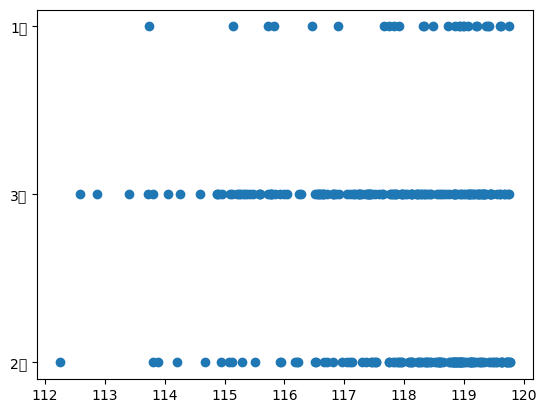

In [14]:
import matplotlib.pyplot as plt
plt.scatter(a['秒数'], a['学年'])

In [83]:
url = 'https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id={}&type_id=1&page={}#sectionRanking'
for i in range(101,104):
    for j in range(1,4):
        print(url.format(i, j))

https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=1#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=2#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=3#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=102&type_id=1&page=1#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=102&type_id=1&page=2#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=102&type_id=1&page=3#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=103&type_id=1&page=1#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=103&type_id=1&page=2#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=103&type_id=1&page=3#sectionRanking


In [ ]:
d_list = []
url = 'https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id={}&type_id=1&page={}#sectionRanking'
for event in range(101,107):
    for page in range(1,97):
        target_url = url.format(event, page)
        print(len(d_list))
        print(target_url.format(event, page))
        r=requests.get(target_url)
        sleep(1)
        soup = BeautifulSoup(r.text)
        contents = soup.find_all('tr')
        for i, content in enumerate(soup.find_all('tr')):
            if i == 0:
                continue  # 0行目をスキップする
            else:
                time = content.find('td', class_='record').text
                name = content.find('td', class_='name').text.replace('\t','').replace('\r\n','')
                prefecture = content.find('td', class_='pref').text
                school = content.find('td', class_='school').text
                grade = content.find('td', class_='year').text
                date = content.find('td', class_='date').text
                category = soup.find('h4').text.replace('ポイント','')
                text = soup.find('h2').find('img')#yearを取るための前処理
                year = re.findall(r'\d+', str(text))[0]
                d = {
                '記録': time,
                '名前': name,
                '都道府県': prefecture,
                '学校': school,
                '学年': grade,
                '競技日': date,
                '種目': category,
                '年度': year
                }
                d_list.append(d)

0
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=1#sectionRanking
100
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=2#sectionRanking
200
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=3#sectionRanking


In [6]:
d_list = []
url = 'https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id={}&type_id=1&page={}#sectionRanking'
for event in range(101,107):
    for page in range(1,97):
        target_url = url.format(event, page)
        print(len(d_list))
        print(target_url.format(event, page))
        r=requests.get(target_url)
        sleep(1)
        soup = BeautifulSoup(r.text)
        contents = soup.find_all('tr')
        for i, content in enumerate(soup.find_all('tr')):
            if i == 0:
                continue  # 0行目をスキップする
            else:
                time = content.find('td', class_='record').text
                name = content.find('td', class_='name').text.replace('\t','').replace('\r\n','')
                prefecture = content.find('td', class_='pref').text
                school = content.find('td', class_='school').text
                grade = content.find('td', class_='year').text
                date = content.find('td', class_='date').text
                category = soup.find('h4').text.replace('ポイント','')
                text = soup.find('h2').find('img')#yearを取るための前処理
                year = re.findall(r'\d+', str(text))[0]
                d = {
                '記録': time,
                '名前': name,
                '都道府県': prefecture,
                '学校': school,
                '学年': grade,
                '競技日': date,
                '種目': category,
                '年度': year
                }
                d_list.append(d)

0
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=1#sectionRanking
100
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=2#sectionRanking
200
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=3#sectionRanking
300
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=4#sectionRanking
400
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=5#sectionRanking
500
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=6#sectionRanking
600
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=7#sectionRanking
700
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=8#sectionRanking
800
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=9#sectionRanking
900
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_i

In [11]:
df = pd.DataFrame(d_list)
df.to_csv('T&F2020_men.csv', index=False)

In [28]:
d_list = []
url = 'https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id={}&type_id=1&page={}#sectionRanking'
for event in range(101,107):
    for page in range(1,43):
        target_url = url.format(event, page)
        print(len(d_list))
        print(target_url.format(event, page))
        r=requests.get(target_url)
        sleep(1)
        soup = BeautifulSoup(r.text)
        contents = soup.find_all('tr')
        for i, content in enumerate(soup.find_all('tr')):
            if i == 0:
                continue  # 0行目をスキップする
            else:
                time = content.find('td', class_='record').text
                name = content.find('td', class_='name').text.replace('\r\n\t','').replace('\t','').replace('\n','').replace('★','')
                prefecture = content.find('td', class_='pref').text
                school = content.find('td', class_='school').text
                grade = content.find('td', class_='year').text
                date = content.find('td', class_='date').text
                category = soup.find('h4').text.replace('ポイント','')
                text = soup.find('h2').find('img')#yearを取るための前処理
                year = re.findall(r'\d+', str(text))[0]
                d = {
                '記録': time,
                '名前': name,
                '都道府県': prefecture,
                '学校': school,
                '学年': grade,
                '競技日': date,
                '種目': category,
                '年度': year
                }
                d_list.append(d)

0
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=101&type_id=1&page=1#sectionRanking
100
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=101&type_id=1&page=2#sectionRanking
200
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=101&type_id=1&page=3#sectionRanking
300
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=101&type_id=1&page=4#sectionRanking
400
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=101&type_id=1&page=5#sectionRanking
500
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=101&type_id=1&page=6#sectionRanking
600
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=101&type_id=1&page=7#sectionRanking
700
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=101&type_id=1&page=8#sectionRanking
800
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=101&type_id=1&page=9#sectionRanking
900
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_i

In [ ]:
d_list = []
url = 'https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id={}&type_id=1&page={}#sectionRanking'
for event in range(101,107):
    for page in range(1,43):
        target_url = url.format(event, page)
        print(len(d_list))
        print(target_url.format(event, page))
        r=requests.get(target_url)
        sleep(1)
        soup = BeautifulSoup(r.text)
        contents = soup.find_all('tr')
        for i, content in enumerate(soup.find_all('tr')):
            if i == 0:
                continue  # 0行目をスキップする
            else:
                time = content.find('td', class_='record').text
                name = content.find('td', class_='name').text.replace('\r\n\t','').replace('\t','').replace('\n','').replace('★','')
                prefecture = content.find('td', class_='pref').text
                school = content.find('td', class_='school').text
                grade = content.find('td', class_='year').text
                date = content.find('td', class_='date').text
                category = soup.find('h4').text.replace('ポイント','')
                text = soup.find('h2').find('img')#yearを取るための前処理
                year = re.findall(r'\d+', str(text))[0]
                d = {
                '記録': time,
                '名前': name,
                '都道府県': prefecture,
                '学校': school,
                '学年': grade,
                '競技日': date,
                '種目': category,
                '年度': year
                }
                d_list.append(d)

In [30]:
a = pd.DataFrame(d_list)
a.to_csv('T&F2021_men.csv', index=False)
a

,記録,名前,都道府県,学校,学年,競技日,種目,年度
0,10.17,佐賀陽,青森,田名部,3年,6月20日,男子100m,2021
1,10.38,守祐陽,千葉,市立船橋,3年,5月14日,男子100m,2021
2,10.43,久保井颯,徳島,鳴門渦潮,3年,6月6日,男子100m,2021
3,10.47,三井一輝,埼玉,春日部,3年,5月10日,男子100m,2021
4,10.53,田中翔大,佐賀,佐賀工,3年,6月18日,男子100m,2021
...,...,...,...,...,...,...,...,...
19282,21:59.48,山下瑠星,香川,四学香川西,1年,6月6日,男子5000m,2021
19283,22:07.00,高木歩夢,三重,桑名工,3年,5月30日,男子5000m,2021
19284,24:01.75,小助川圭裕,北海道,稚内,1年,5月22日,男子5000m,2021
19285,24:28.89,吉田修基,北海道,苫小牧工,1年,5月20日,男子5000m,2021


In [32]:
pd.read_csv('T&F2020_men.csv')

,記録,名前,都道府県,学校,学年,競技日,種目,年度
0,10.32,柳田大輝,群馬,農大二,2年,9月5日,男子100m,2020
1,10.39,河田航典,愛知,中京大中京,3年,7月23日,男子100m,2020
2,10.44,三輪颯太,埼玉,西武文理,3年,8月11日,男子100m,2020
3,10.46,高木陸,茨城,土浦湖北,3年,7月24日,男子100m,2020
4,10.46,重谷大樹,福岡,九産大付九産,3年,8月23日,男子100m,2020
...,...,...,...,...,...,...,...,...
30413,22:01.12,梅原善,兵庫,須磨翔風,1年,7月26日,男子5000m,2020
30414,22:06.73,福島泰介,宮城,仙台工,1年,8月10日,男子5000m,2020
30415,22:24.13,大塚皓介,北海道,岩見沢農,1年,7月26日,男子5000m,2020
30416,22:26.50,山下綺斗,兵庫,須磨東,1年,7月26日,男子5000m,2020


In [18]:
def convert_to_seconds(time_str):
    if ':' in time_str:
        minutes, seconds = time_str.split(':')
        return int(minutes) * 60 + float(seconds)
    else:
        return float(time_str)
a['秒数'] = a['記録'].apply(convert_to_seconds)
a

,記録,名前,都道府県,学校,学年,競技日,種目,年度,秒数
0,10.32,柳田大輝,群馬,農大二,2年,9月5日,男子100m,2020,10.32
1,10.39,河田航典,愛知,中京大中京,3年,7月23日,男子100m,2020,10.39
2,10.44,三輪颯太,埼玉,西武文理,3年,8月11日,男子100m,2020,10.44
3,10.46,高木陸,茨城,土浦湖北,3年,7月24日,男子100m,2020,10.46
4,10.46,重谷大樹,福岡,九産大付九産,3年,8月23日,男子100m,2020,10.46
...,...,...,...,...,...,...,...,...,...
895,50.77,黒木史也,滋賀,比叡山,3年,8月21日,男子400m,2020,50.77
896,50.77,広部翔太,兵庫,神戸科技,3年,7月24日,男子400m,2020,50.77
897,50.77,竹内蒼竜,広島,西条農,3年,7月11日,男子400m,2020,50.77
898,50.78,須長勇人,埼玉,豊岡,2年,8月10日,男子400m,2020,50.78


In [88]:
for i in range(101,104):
    for j in range(1,4):
        target_url = url.format(i, j)
        print(target_url.format(i, j))

https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=1#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=2#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=101&type_id=1&page=3#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=102&type_id=1&page=1#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=102&type_id=1&page=2#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=102&type_id=1&page=3#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=103&type_id=1&page=1#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=103&type_id=1&page=2#sectionRanking
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=103&type_id=1&page=3#sectionRanking


In [19]:
# タイムを降順にソート
a = a.sort_values(by=['種目', '年度', '秒数'], ascending=[True, True, False])

# 種目と年度ごとにグループ化し、上位66人を取得
b = a.groupby(['種目', '年度']).head(66)

# 学校ごとの出現回数を計算し、2回以上出現する学校を抽出
c = b['学校'].value_counts()
powerhouse = c[c >= 2].index.tolist()

# 強豪校の列を追加
a['強豪校'] = a['学校'].apply(lambda x: 1 if x in powerhouse else 0)
a

,記録,名前,都道府県,学校,学年,競技日,種目,年度,秒数,強豪校
249,11.03,山本永遠,熊本,小川工,2年,7月25日,男子100m,2020,11.03,0
265,11.01,上田嵩矢,鳥取,鳥取育英,3年,7月25日,男子100m,2020,11.01,1
287,11.01,長澤優真,千葉,西武台千葉,3年,8月8日,男子100m,2020,11.01,0
288,11.01,阿部隆佑,神奈川,相洋,3年,9月5日,男子100m,2020,11.01,1
289,11.01,佐藤友麻,北海道,恵庭南,3年,7月23日,男子100m,2020,11.01,0
...,...,...,...,...,...,...,...,...,...,...
604,47.46,鈴木竜馬,福島,磐城,3年,8月22日,男子400m,2020,47.46,1
603,47.39,町田怜央,福島,日大東北,2年,8月22日,男子400m,2020,47.39,1
602,47.35,大野心碧,高知,土佐,3年,7月18日,男子400m,2020,47.35,0
601,47.04,友田真隆,埼玉,川越東,3年,8月10日,男子400m,2020,47.04,0


In [25]:
pd.DataFrame(a[['学校','強豪校']].value_counts())#.groupby('学校').sum()

,,0
学校,強豪校,
洛南,0,11
明星学園,0,11
社,1,11
城西,1,10
市立船橋,1,9
...,...,...
水口東,0,1
水戸商,0,1
水戸工,0,1


In [33]:
# タイムを降順にソート
a = a.sort_values(by=['種目', '年度', '秒数'], ascending=[True, True, False])

# 種目と年度ごとにグループ化し、上位66人を取得
b = a.groupby(['種目', '年度']).head(66)

# 学校ごとの出現回数を計算し、2回以上出現する学校を抽出
c = b['学校'].value_counts()
powerhouse = c[c >= 2].index.tolist()

# 強豪校の列を追加
a['強豪校'] = a['学校'].apply(lambda x: 1 if x in powerhouse else 0)

In [27]:
c

生野      3
城西      3
市立船橋    3
乙訓      3
西京      3
       ..
関大北陽    1
奈良育英    1
姫路南     1
栄徳      1
明石南     1
Name: 学校, Length: 163, dtype: int64

In [29]:
powerhouse 

['生野',
 '城西',
 '市立船橋',
 '乙訓',
 '西京',
 '鳥取育英',
 '佐久長聖',
 '菅',
 '安城学園',
 '静岡西',
 '豊科',
 '磐城',
 '龍谷',
 '朝霞西',
 '社',
 '北海',
 '名古屋',
 'つくば秀英',
 '荏田',
 '宮崎工',
 '滝川第二',
 '相洋',
 '日大東北',
 '灘',
 '袋井',
 '自由ケ丘',
 '新潟明訓',
 '大塚']

In [32]:
a[a['学校'] == '灘']

,記録,名前,都道府県,学校,学年,競技日,種目,年度,秒数,強豪校
229,10.97,藤江琉雅,兵庫,灘,2年,7月24日,男子100m,2020,10.97,1
444,22.15,藤江琉雅,兵庫,灘,2年,7月26日,男子200m,2020,22.15,1
849,50.55,施開人,兵庫,灘,2年,7月24日,男子400m,2020,50.55,1


In [4]:
for i in range(101,104), (120):
    for j in range(1,4):
        print(i, j)

range(101, 104) 1
range(101, 104) 2
range(101, 104) 3
120 1
120 2
120 3


In [5]:
from itertools import chain

for i in chain(range(101, 104), [120]):
    for j in range(1, 4):
        print(i, j)

101 1
101 2
101 3
102 1
102 2
102 3
103 1
103 2
103 3
120 1
120 2
120 3


In [19]:
from itertools import chain
d_list = []
url = 'https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id={}&type_id=1&page={}#sectionRanking'
for event in chain(range(121,126), [149]):
    for page in range(1,32):
        target_url = url.format(event, page)
        print(len(d_list))
        print(target_url.format(event, page))
        r=requests.get(target_url)
        sleep(1)
        soup = BeautifulSoup(r.text)
        contents = soup.find_all('tr')
        for i, content in enumerate(soup.find_all('tr')):
            if i == 0:
                continue  # 0行目をスキップする
            else:
                time = content.find('td', class_='record').text
                name = content.find('td', class_='name').text.replace('\r\n\t','').replace('\t','').replace('\n','').replace('★','')
                prefecture = content.find('td', class_='pref').text
                school = content.find('td', class_='school').text
                grade = content.find('td', class_='year').text
                date = content.find('td', class_='date').text
                category = soup.find('h4').text.replace('ポイント','')
                text = soup.find('h2').find('img')#yearを取るための前処理
                year = re.findall(r'\d+', str(text))[0]
                d = {
                '記録': time,
                '名前': name,
                '都道府県': prefecture,
                '学校': school,
                '学年': grade,
                '競技日': date,
                '種目': category,
                '年度': year
                }
                d_list.append(d)

0
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=121&type_id=1&page=1#sectionRanking
100
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=121&type_id=1&page=2#sectionRanking
200
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=121&type_id=1&page=3#sectionRanking
300
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=121&type_id=1&page=4#sectionRanking
400
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=121&type_id=1&page=5#sectionRanking
500
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=121&type_id=1&page=6#sectionRanking
600
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=121&type_id=1&page=7#sectionRanking
700
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=121&type_id=1&page=8#sectionRanking
800
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_id=121&type_id=1&page=9#sectionRanking
900
https://www.jaaf.or.jp/remote/highschool/2020/ranking/?event_i

In [21]:
df = pd.DataFrame(d_list)
df
df.to_csv('T&F2020_women.csv', index=False)

In [23]:
a = pd.read_csv('T&F2020_women.csv')
a

,記録,名前,都道府県,学校,学年,競技日,種目,年度
0,11.72,安達茉鈴,京都,京都橘,3年,8月10日,女子100m,2020
1,11.80,石川優,神奈川,相洋,3年,9月5日,女子100m,2020
2,11.84,永石小雪,佐賀,佐賀北,2年,8月1日,女子100m,2020
3,11.86,藏重みう,愛知,中京大中京,1年,7月23日,女子100m,2020
4,11.91,治武杏祈,滋賀,近江,2年,8月22日,女子100m,2020
...,...,...,...,...,...,...,...,...
13514,15:06.63,畑中あかり,岐阜,郡上,2年,8月2日,女子3000m,2020
13515,15:15.53,松原明日美,北海道,札幌西陵,2年,7月23日,女子3000m,2020
13516,15:33.89,鈴木遙菜,宮城,亘理,1年,8月11日,女子3000m,2020
13517,15:54.65,大井和奏,宮城,角田,2年,8月11日,女子3000m,2020


In [24]:
from itertools import chain
d_list = []
url = 'https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id={}&type_id=1&page={}#sectionRanking'
for event in chain(range(121,126), [149]):
    for page in range(1,32):
        target_url = url.format(event, page)
        print(len(d_list))
        print(target_url.format(event, page))
        r=requests.get(target_url)
        sleep(1)
        soup = BeautifulSoup(r.text)
        contents = soup.find_all('tr')
        for i, content in enumerate(soup.find_all('tr')):
            if i == 0:
                continue  # 0行目をスキップする
            else:
                time = content.find('td', class_='record').text
                name = content.find('td', class_='name').text.replace('\r\n\t','').replace('\t','').replace('\n','').replace('★','')
                prefecture = content.find('td', class_='pref').text
                school = content.find('td', class_='school').text
                grade = content.find('td', class_='year').text
                date = content.find('td', class_='date').text
                category = soup.find('h4').text.replace('ポイント','')
                text = soup.find('h2').find('img')#yearを取るための前処理
                year = re.findall(r'\d+', str(text))[0]
                d = {
                '記録': time,
                '名前': name,
                '都道府県': prefecture,
                '学校': school,
                '学年': grade,
                '競技日': date,
                '種目': category,
                '年度': year
                }
                d_list.append(d)

0
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=121&type_id=1&page=1#sectionRanking
100
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=121&type_id=1&page=2#sectionRanking
200
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=121&type_id=1&page=3#sectionRanking
300
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=121&type_id=1&page=4#sectionRanking
400
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=121&type_id=1&page=5#sectionRanking
500
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=121&type_id=1&page=6#sectionRanking
600
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=121&type_id=1&page=7#sectionRanking
700
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=121&type_id=1&page=8#sectionRanking
800
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_id=121&type_id=1&page=9#sectionRanking
900
https://www.jaaf.or.jp/remote/highschool/2021/ranking/?event_i

In [26]:
df = pd.DataFrame(d_list)
df.to_csv('T&F2021_women.csv', index=False)

In [41]:
men_2021 = pd.read_csv('T&F2021_men.csv')
men_2020 = pd.read_csv('T&F2020_men.csv')

In [45]:
men = pd.concat([men_2020,men_2021], axis=0).sort_values(['記録', '種目', '年度'], ascending=[True, True, False])

In [46]:
men

,記録,名前,都道府県,学校,学年,競技日,種目,年度
0,10.17,佐賀陽,青森,田名部,3年,6月20日,男子100m,2021
0,10.32,柳田大輝,群馬,農大二,2年,9月5日,男子100m,2020
1,10.38,守祐陽,千葉,市立船橋,3年,5月14日,男子100m,2021
1,10.39,河田航典,愛知,中京大中京,3年,7月23日,男子100m,2020
2,10.43,久保井颯,徳島,鳴門渦潮,3年,6月6日,男子100m,2021
...,...,...,...,...,...,...,...,...
27693,6:43.50,石川昌史,大阪,天王寺,1年,8月9日,男子1500m,2020
27694,6:45.02,前田拓夢,兵庫,神戸科技,1年,7月24日,男子1500m,2020
27695,6:53.72,村瀬敦哉,岐阜,岐阜清流高特,1年,8月1日,男子1500m,2020
17056,7:01.63,茶木陽斗,大阪,登美丘,2年,5月28日,男子1500m,2021


In [66]:
a = men[(men['名前'] == '佐賀陽') & (men['種目'] == '男子100m')]
def convert_to_seconds(time_str):
    if ':' in time_str:
        minutes, seconds = time_str.split(':')
        return int(minutes) * 60 + float(seconds)
    else:
        return float(time_str)
a['秒数'] = a['記録'].apply(convert_to_seconds)
a.dtypes

/var/folders/n9/zgqvn5d12hz5n63yqcth89hr0000gq/T/ipykernel_845/2045469253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['秒数'] = a['記録'].apply(convert_to_seconds)


記録       object
名前       object
都道府県     object
学校       object
学年       object
競技日      object
種目       object
年度        int64
秒数      float64
dtype: object

In [70]:
pd.DataFrame(a.groupby(['名前', '種目'])['秒数'].diff()).mean()

秒数    0.73
dtype: float64

In [68]:
a

,記録,名前,都道府県,学校,学年,競技日,種目,年度,秒数
0,10.17,佐賀陽,青森,田名部,3年,6月20日,男子100m,2021,10.17
157,10.90,佐賀陽,青森,田名部,2年,7月19日,男子100m,2020,10.90
